In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [15]:
base_dir = '/content/drive/MyDrive/shot/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [16]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [17]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [18]:
MobileNetV2_model = Sequential()

pretrained_model= tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

MobileNetV2_model.add(pretrained_model)

In [20]:
MobileNetV2_model.add(tf.keras.layers.Flatten())
MobileNetV2_model.add(tf.keras.layers.Dense(512, activation='relu'))
MobileNetV2_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
MobileNetV2_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = MobileNetV2_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 23s 694ms/step - loss: 1.1168 - accuracy: 0.5400 - val_loss: 0.7851 - val_accuracy: 0.5333
Epoch 2/50
20/20 [==============================] - 4s 175ms/step - loss: 0.5514 - accuracy: 0.7100 - val_loss: 0.6670 - val_accuracy: 0.5667
Epoch 3/50
20/20 [==============================] - 4s 172ms/step - loss: 0.4620 - accuracy: 0.7900 - val_loss: 0.6390 - val_accuracy: 0.6667
Epoch 4/50
20/20 [==============================] - 4s 179ms/step - loss: 0.3486 - accuracy: 0.8300 - val_loss: 0.7985 - val_accuracy: 0.5333
Epoch 5/50
20/20 [==============================] - 4s 186ms/step - loss: 0.3427 - accuracy: 0.8500 - val_loss: 0.6650 - val_accuracy: 0.7333
Epoch 6/50
20/20 [==============================] - 4s 196ms/step - loss: 0.2532 - accuracy: 0.8800 - val_loss: 1.0279 - val_accuracy: 0.6000
Epoch 7/50
20/20 [==============================] - 4s 190ms/step - loss: 0.2494 - accuracy: 0.9000 - val_loss: 0.5840 - val_accuracy: 0.6667
Epoch 8/50
20/20

Text(0.5, 1.0, 'Training and Validation Accuracy (MobileNetV2)')

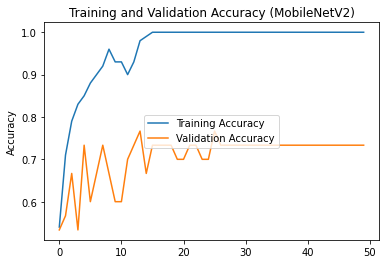

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (MobileNetV2)')

In [23]:
loss, accuracy = MobileNetV2_model.evaluate(validation)
print('Test accuracy :', accuracy)

6/6 [==============================] - 1s 119ms/step - loss: 0.9558 - accuracy: 0.7333
Test accuracy : 0.7333333492279053


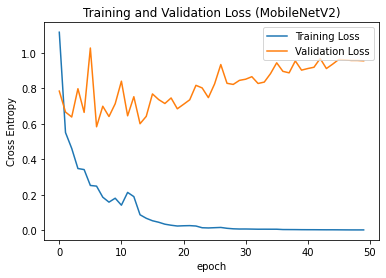

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss (MobileNetV2)')
plt.xlabel('epoch')
plt.show()